In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from plotnine import geom_point, ggplot, aes, geom_line, xlab, ylab, ggtitle, geom_point, theme, element_text

import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
from arch import arch_model
from pyextremes import EVA

import statistics as stat
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import VECM
from scipy.stats import kurtosis

from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen

from copulas.multivariate import VineCopula
import warnings

from arch import arch_model
from statsmodels.tsa.vector_ar.vecm import VECM


## Data importing

In [2]:
price_gold_etf = yf.download('GLD','2020-01-01','2020-12-31').Close
price_equity_etf = yf.download('VEU','2020-01-01','2020-12-31').Close
price_bitcoin = yf.download('BTC-USD','2020-01-01','2020-12-31').Close

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Data Processing

In [3]:
#Log returns
gold_returns = 100 * (np.log(price_gold_etf['2020-03-31':]) - np.log(price_gold_etf['2020-03-31':].shift(1))).dropna()
equity_returns = 100 * (np.log(price_equity_etf['2020-03-31':]) - np.log(price_equity_etf['2020-03-31':].shift(1))).dropna()
bitcoin_returns = 100 * (np.log(price_bitcoin['2020-03-31':]) - np.log(price_bitcoin['2020-03-31':].shift(1))).dropna()

## Data Summaries

### Compute the kurtosis for each series.

In [4]:
gold_kurtosis = kurtosis(gold_returns, fisher=False)
equity_kurtosis = kurtosis(equity_returns, fisher=False)
bitcoin_kurtosis = kurtosis(bitcoin_returns, fisher=False)

print('Gold ETF kurtosis: {:.5f}'.format(gold_kurtosis))
print('Equity ETF kurtosis: {:.5f}'.format(equity_kurtosis))
print('Bitcoin kurtosis: {:.5f}'.format(bitcoin_kurtosis))

Gold ETF kurtosis: 7.16366
Equity ETF kurtosis: 5.47645
Bitcoin kurtosis: 5.72957


### Compute the returns for each series.   

<AxesSubplot:xlabel='Date'>

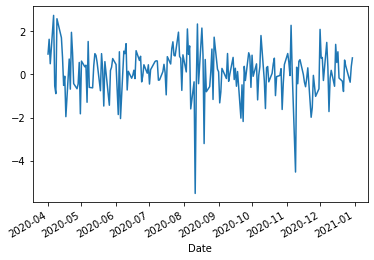

In [5]:
gold_returns.plot()

<AxesSubplot:xlabel='Date'>

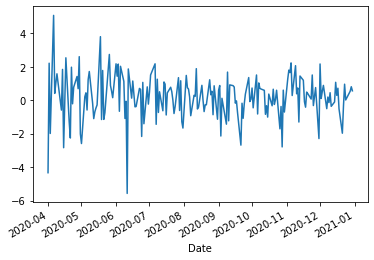

In [6]:
equity_returns.plot()

<AxesSubplot:xlabel='Date'>

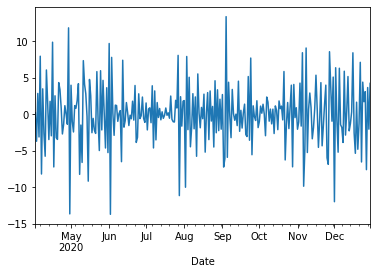

In [7]:
bitcoin_returns.diff().dropna().plot()

### Peak over threshold approach

In [8]:
model1 = EVA(data=gold_returns)
model2 = EVA(data=equity_returns)
model3 = EVA(data=bitcoin_returns)

We extract the extreme values from the timeseries and plot them 

In [9]:
model1.get_extremes(
    method="POT",
    extremes_type="high",
    threshold = 1
)

model2.get_extremes(
    method="POT",
    extremes_type="high",
    threshold= 2
)

model3.get_extremes(
    method="POT",
    extremes_type="high",
    threshold=4
)


(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Date', ylabel='Close'>)

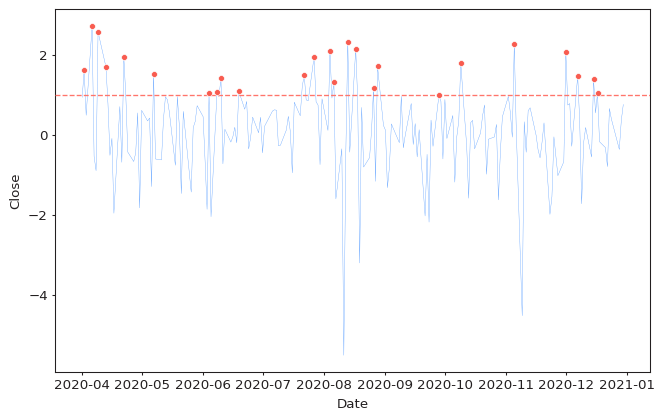

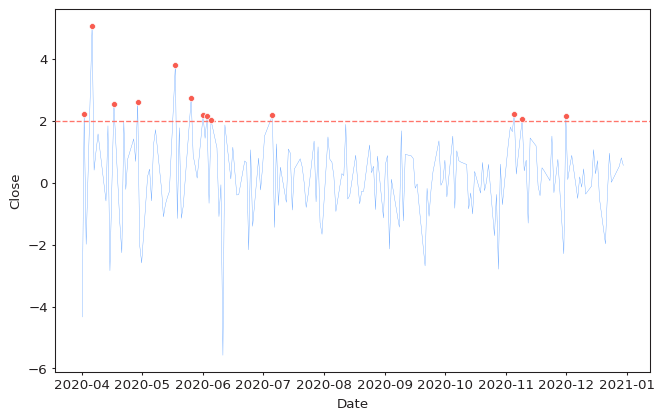

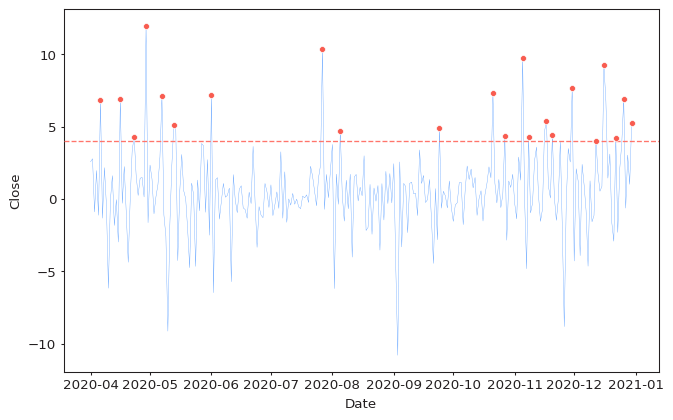

In [10]:
model1.plot_extremes()
model2.plot_extremes()
model3.plot_extremes()

In [11]:
model1.fit_model()
model2.fit_model()
model3.fit_model()

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Close'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Close', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

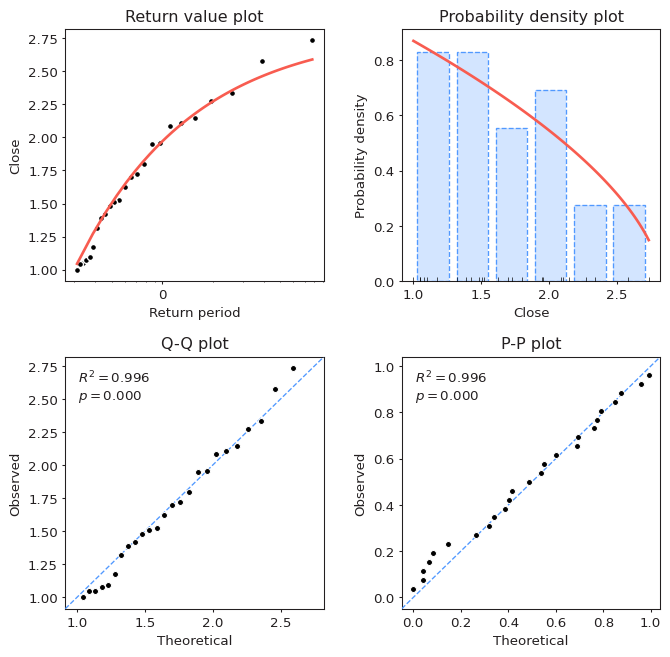

In [13]:
import warnings
warnings.filterwarnings('ignore')

# Gold diagnostics
model1.plot_diagnostic()

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Close'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Close', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

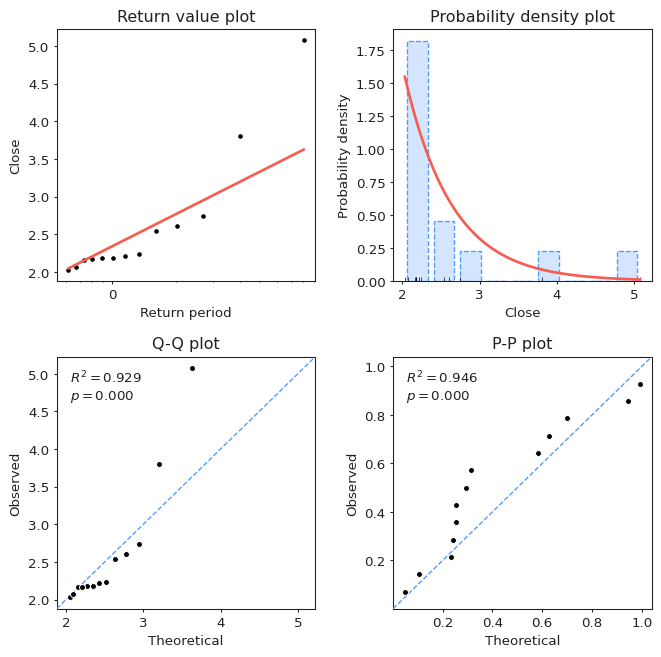

In [14]:
# Equity diagnostics
model2.plot_diagnostic()

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Close'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Close', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

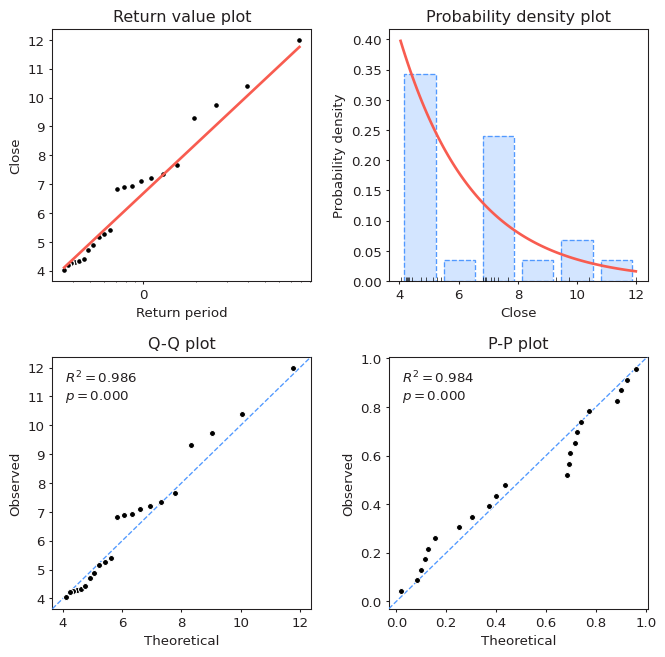

In [15]:
# BTC diagnostics
model3.plot_diagnostic()